# Zillow

The `zillow.csv` file contains several recently sold houses in the Boulder area.  

How well can you predict home sale prices?

In [17]:
%matplotlib inline
import pandas as pd

df = pd.read_csv("zillow.csv", parse_dates=['date_sold'])
[x for x in df.columns]

['address',
 'baths',
 'beds',
 'city',
 'date_sold',
 'hoa_fee',
 'last_sold_price',
 'latitude',
 'longitude',
 'parking',
 'price',
 'property_value',
 'rent_high',
 'rent_low',
 'rent_value',
 'sqft',
 'tax_assessed_value',
 'tax_rate',
 'type',
 'year_built',
 'zest_high',
 'zest_low',
 'zest_value',
 'zestimate']

/Users/david/anaconda/envs/boulderdatascience/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()


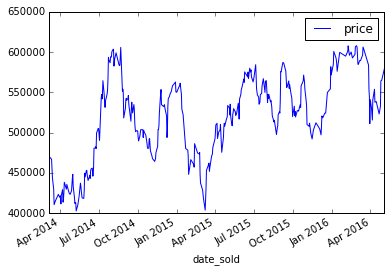

In [18]:
df.dropna(inplace=True)
df.sort_values(by="date_sold", inplace=True)

price = df[['date_sold', 'price']]

pd.rolling_mean(price.groupby('date_sold').agg('mean'), window=30).dropna().plot()

Consider a few other models...

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

Maybe these will be useful

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

If you are feeling it...

In [21]:
from sklearn import cross_validation

In [138]:
X = df[['sqft', 'beds', 'baths', 'year_built', 'tax_rate']]
y = df['price']

In [142]:
regr = KNeighborsRegressor()
regr.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [146]:
[(x.fit(X, y), x.score(X, y)) for x in [KNeighborsRegressor(), LinearRegression()]]

[(KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'), 0.75983950636022057),
 (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  0.67305661948759077)]

In [147]:
import numpy as np

In [148]:
regr.score(X, y)

0.75983950636022057

In [137]:
df['tax_rate']

1975    0.0054
2305    0.0054
3344    0.0054
159     0.0054
4620    0.0054
1499    0.0054
2920    0.0054
1786    0.0054
5794    0.0054
5500    0.0054
5407    0.0054
408     0.0054
2124    0.0054
3835    0.0054
5488    0.0054
3939    0.0054
5018    0.0054
3700    0.0054
2979    0.0054
1272    0.0054
4860    0.0054
1591    0.0054
3637    0.0054
6060    0.0054
3037    0.0054
5110    0.0054
3330    0.0054
5506    0.0054
2400    0.0054
3147    0.0054
         ...  
5157    0.0054
4111    0.0054
1650    0.0054
2047    0.0054
660     0.0054
1464    0.0054
2593    0.0054
617     0.0054
5636    0.0054
1448    0.0054
5556    0.0054
2762    0.0054
5655    0.0054
1707    0.0054
2262    0.0054
1992    0.0054
3778    0.0054
5385    0.0054
3636    0.0054
448     0.0054
1229    0.0054
6052    0.0054
2897    0.0054
4155    0.0054
4404    0.0054
1342    0.0054
1631    0.0054
4193    0.0054
4078    0.0054
3229    0.0054
Name: tax_rate, dtype: float64

In [92]:
X_new = np.linspace(0, X.max()[0], 5)[:, np.newaxis] # to make it (n, m)
y_pred = regr.predict(X_new)

In [93]:
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.color_cycle']

def plot():
    fig, ax = plt.subplots()

    ax.plot(X_new[:,0], y_pred, color='darkgrey', linewidth=2)
    ax.scatter(X, y, s=100, alpha=0.75, c=colors[0])

    ax.set_xlabel('X')
    ax.set_ylabel('y')

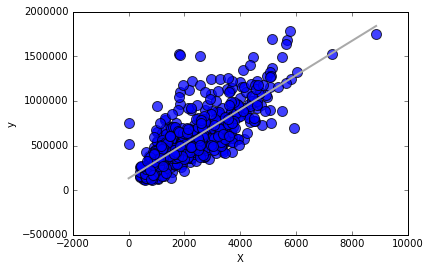

In [94]:
plot()